Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Delta\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Delta\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backend_bases.py", line 3310, in configure_subplots
    self.subplot_tool = plt.subplot_tool(self.canvas.figure)
  File "C:\Users\Delta\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\pyplot.py", line 1639, in subplot_tool
    manager.show()
  File "C:\Users\Delta\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backend_bases.py", line 2781, in show
    raise NonGuiException(
matplotlib.backend_bases.NonGuiException: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Delta\AppData\Local\Programs\Python

KeyboardInterrupt: 

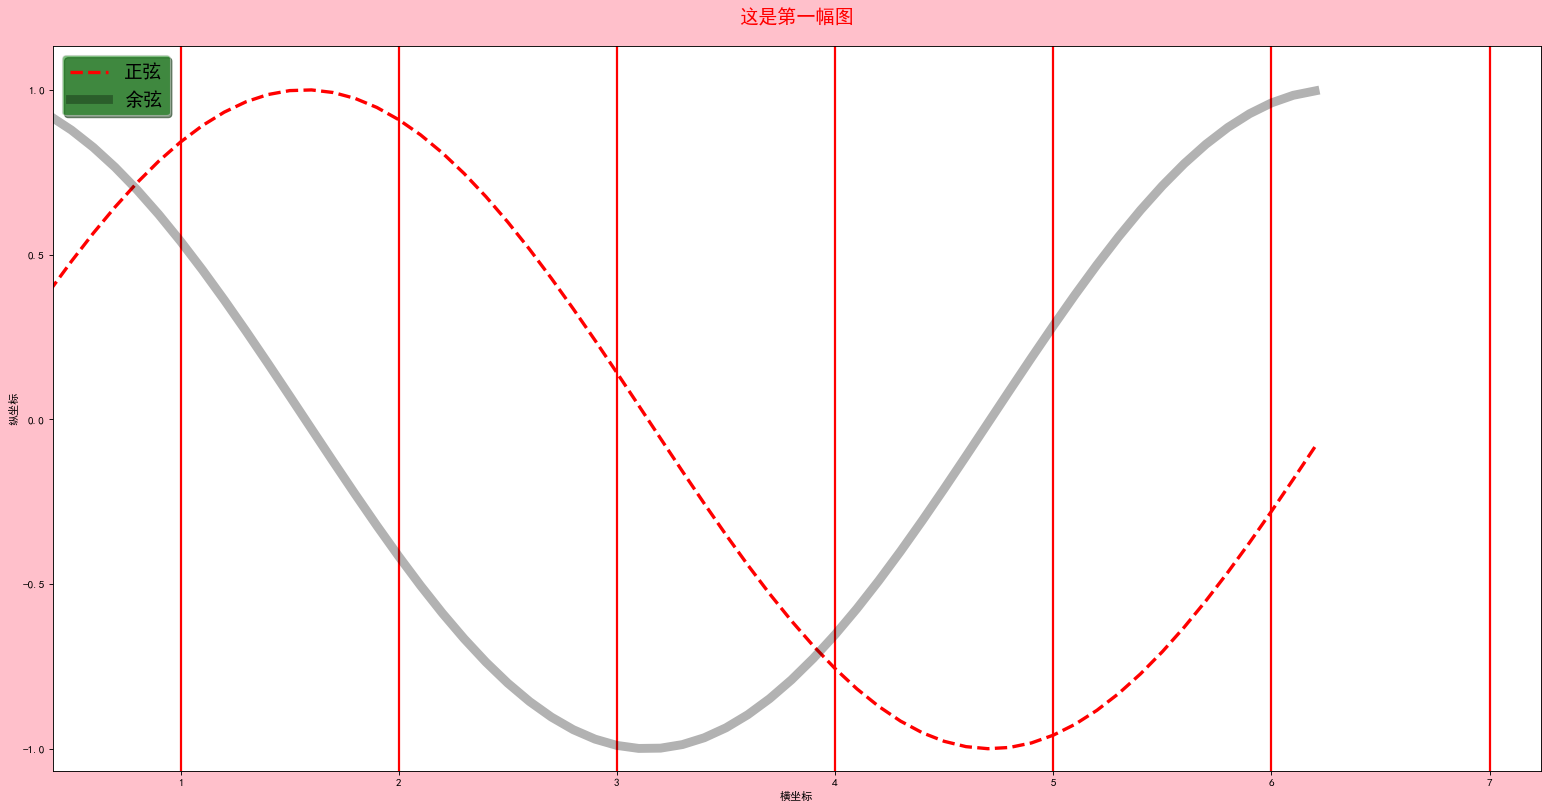

In [8]:
import math
import numpy as np
# -------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
# NavigationToolbar2TkAgg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
# ------------------------------------------------------------------------------------------
import tkinter as tk
# ------------------------------------------------------------------------------------------


mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
mpl.rcParams['axes.unicode_minus'] = False  # 负号显示


class From:
    def __init__(self):
        self.root = tk.Tk()  # 创建主窗体
        self.canvas = tk.Canvas()  # 创建一块显示图形的画布
        self.figure = self.create_matplotlib()  # 返回matplotlib所画图形的figure对象
        self.create_form(self.figure)  # 将figure显示在tkinter窗体上面
        self.root.mainloop()

    def create_matplotlib(self):
        # 创建绘图对象f
        f = plt.figure(num=2, figsize=(16, 12), dpi=80,
                       facecolor="pink", edgecolor='green', frameon=True)
        # 创建一副子图
        fig1 = plt.subplot(1, 1, 1)

        x = np.arange(0, 2*np.pi, 0.1)
        y1 = np.sin(x)
        y2 = np.cos(x)

        line1, = fig1.plot(x, y1, color='red', linewidth=3,
                           linestyle='--')  # 画第一条线
        line2, = fig1.plot(x, y2)
        plt.setp(line2, color='black', linewidth=8,
                 linestyle='-', alpha=0.3)  # 华第二条线

        fig1.set_title("这是第一幅图", loc='center', pad=20,
                       fontsize='xx-large', color='red')  # 设置标题
        line1.set_label("正弦曲线")  # 确定图例
        fig1.legend(['正弦', '余弦'], loc='upper left', facecolor='green',
                    frameon=True, shadow=True, framealpha=0.5, fontsize='xx-large')

        fig1.set_xlabel('横坐标')  # 确定坐标轴标题
        fig1.set_ylabel("纵坐标")
        fig1.set_yticks([-1, -1/2, 0, 1/2, 1])  # 设置坐标轴刻度
        fig1.grid(which='major', axis='x', color='r',
                  linestyle='-', linewidth=2)  # 设置网格

        return f

    def create_form(self, figure):
        # 把绘制的图形显示到tkinter窗口上
        self.canvas = FigureCanvasTkAgg(figure, self.root)
        self.canvas.draw()  # 以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 把matplotlib绘制图形的导航工具栏显示到tkinter窗口上
        # matplotlib 2.2版本之后推荐使用NavigationToolbar2Tk，若使用NavigationToolbar2TkAgg会警告
        toolbar = NavigationToolbar2Tk(self.canvas, self.root)
        toolbar.update()
        self.canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=1)


if __name__ == "__main__":
    form = From()
